In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
credit_data = pd.read_csv("credit.csv")

In [3]:
credit_data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
credit_data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [5]:
credit_data.shape

(100000, 28)

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
credit_data["Customer_ID"].nunique()

12500

#### Data cleaning

* Missing Values 

In [8]:
credit_data.isna().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

* Duplicated values

In [9]:
credit_data.duplicated().sum()

0

In [10]:
#sns.boxplot(x = credit_data["Annual_Income"])

* Inconsistant Data

In [11]:
credit_data.loc[41488:41490]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41488,67866,30454,1,arani Krishnand,35.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.360669,327.0,No,207.563979,97.999771,Low_spent_Small_value_payments,550.292055,Good
41489,67867,30454,2,arani Krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,37.266182,327.0,No,207.563979,97.999771,High_spent_Large_value_payments,619.402043,Good
41490,67868,30454,3,arani Krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.699842,328.0,No,207.563979,97.999771,Low_spent_Large_value_payments,197.101905,Good


In [12]:
# proper format for name column

credit_data["Name"] = credit_data["Name"].str.capitalize()

In [13]:
credit_data[credit_data["Customer_ID"] == 30454].head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
41488,67866,30454,1,Arani krishnand,35.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.360669,327.0,No,207.563979,97.999771,Low_spent_Small_value_payments,550.292055,Good
41489,67867,30454,2,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,37.266182,327.0,No,207.563979,97.999771,High_spent_Large_value_payments,619.402043,Good
41490,67868,30454,3,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,35.699842,328.0,No,207.563979,97.999771,Low_spent_Large_value_payments,197.101905,Good
41491,67869,30454,4,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,29.731132,329.0,No,207.563979,97.999771,High_spent_Large_value_payments,654.341121,Good
41492,67870,30454,5,Arani krishnand,36.0,70142190.0,Mechanic,88325.58,7486.465,0.0,...,Good,547.05,36.700047,330.0,No,207.563979,97.999771,Low_spent_Medium_value_payments,242.334107,Good


In [14]:
# Dealing with "Payment_of_Min_Amount" column

credit_data["Payment_of_Min_Amount"].value_counts()

Yes    52326
No     35667
NM     12007
Name: Payment_of_Min_Amount, dtype: int64

In [15]:
minpay_mode = credit_data["Payment_of_Min_Amount"].mode()[0]

credit_data["Payment_of_Min_Amount"].replace("NM", minpay_mode, inplace = True)

In [16]:
credit_data[credit_data["Payment_of_Min_Amount"] == "NM"]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


<Axes: xlabel='Num_Bank_Accounts', ylabel='Count'>

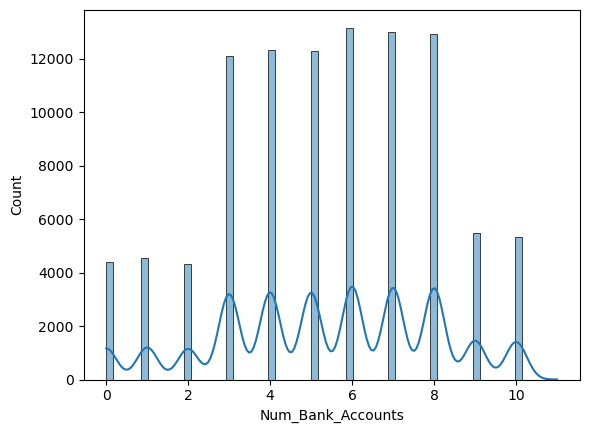

In [17]:
# Dealing with "Num_bnk_account" column

sns.histplot(x = credit_data["Num_Bank_Accounts"], kde=True)

In [18]:
mode_bnkacc = credit_data["Num_Bank_Accounts"].mode()[0]
print(mode_bnkacc)
credit_data["Num_Bank_Accounts"].replace(0, mode_bnkacc, inplace=True)

6.0


In [19]:
credit_data[credit_data["Num_Bank_Accounts"] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score


### EDA

In [20]:
credit_data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.633840,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.323674,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,1.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,4.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,6.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [21]:
# distribution of occupation

work = credit_data.groupby("Customer_ID")["Occupation"].first().value_counts().reset_index(name = "Count")
work.rename({"index":"Occupation"}, axis=1, inplace=True)
work



,Occupation,Count
0,Lawyer,887
1,Engineer,858
2,Architect,853
3,Mechanic,847
4,Accountant,843
5,Scientist,843
6,Developer,840
7,Media_Manager,840
8,Teacher,834
9,Entrepreneur,831


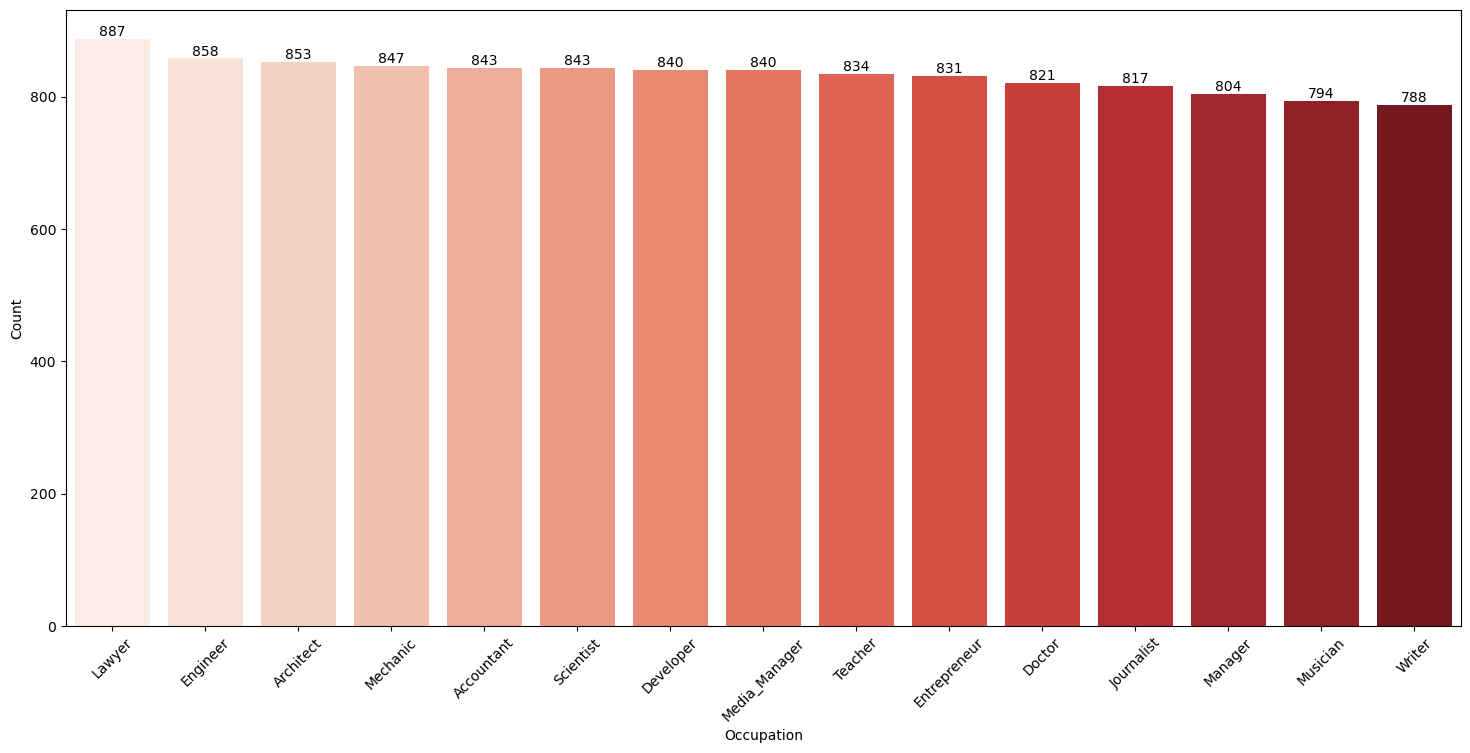

In [22]:
plt.figure(figsize=(18,8))
ax = sns.barplot(y = work["Count"], x = work["Occupation"], palette="Reds")
ax.bar_label(ax.containers[0])
plt.xticks(rotation = 45)
plt.show()

In [23]:
# Number of Bank account

bank_acc = credit_data.groupby('Customer_ID')['Num_Bank_Accounts'].value_counts().reset_index(name='Count')

bank_acc

,Customer_ID,Num_Bank_Accounts,Count
0,1006,9.0,8
1,1007,3.0,8
2,1008,6.0,8
3,1009,6.0,8
4,1011,3.0,8
...,...,...,...
12798,50984,6.0,8
12799,50990,7.0,8
12800,50992,7.0,8
12801,50996,3.0,8


In [24]:
#for same account there are different number of bank accounts
bank_acc[bank_acc["Customer_ID"] == 27857]

,Customer_ID,Num_Bank_Accounts,Count
6956,27857,10.0,4
6957,27857,11.0,4


In [25]:
#bank_acc["Num_Bank_Accounts"].value_counts()

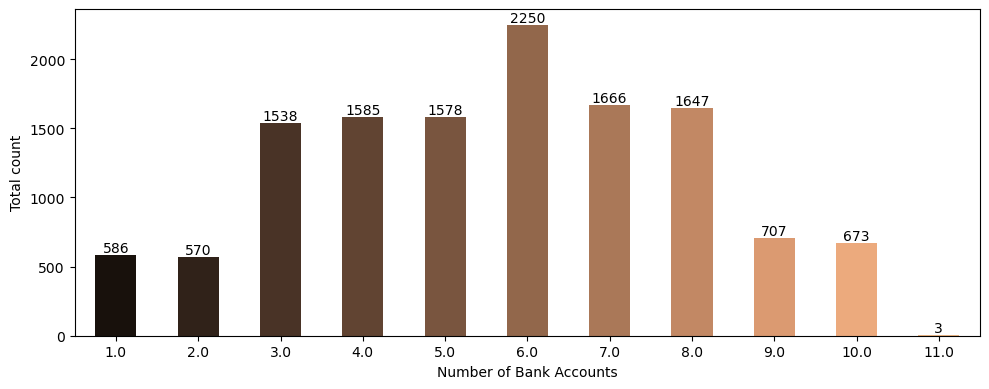

In [26]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x = bank_acc["Num_Bank_Accounts"].value_counts().index, y = bank_acc["Num_Bank_Accounts"].value_counts().values, palette = "copper", width=0.5)
ax.bar_label(ax.containers[0])
plt.ylabel("Total count")
plt.xlabel("Number of Bank Accounts")

plt.tight_layout()
plt.show()

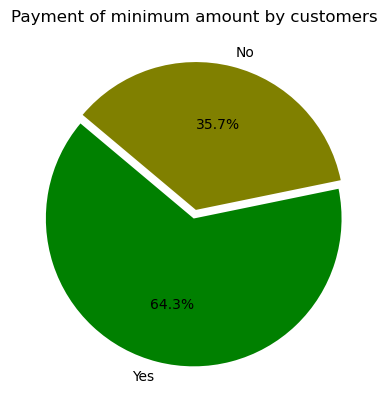

In [27]:
# Payment of Min Amount

min_pay = credit_data["Payment_of_Min_Amount"].value_counts()
#print(min_pay)

plt.figure()
plt.pie(x = min_pay.values, labels=["Yes","No"], explode = [0.03,0.03], colors=["green","olive"],  autopct='%1.1f%%', startangle=140)
plt.title("Payment of minimum amount by customers")
plt.show()

In [28]:
# Annual income

annual_income = credit_data.groupby('Customer_ID')['Annual_Income'].value_counts().reset_index(name='Count')


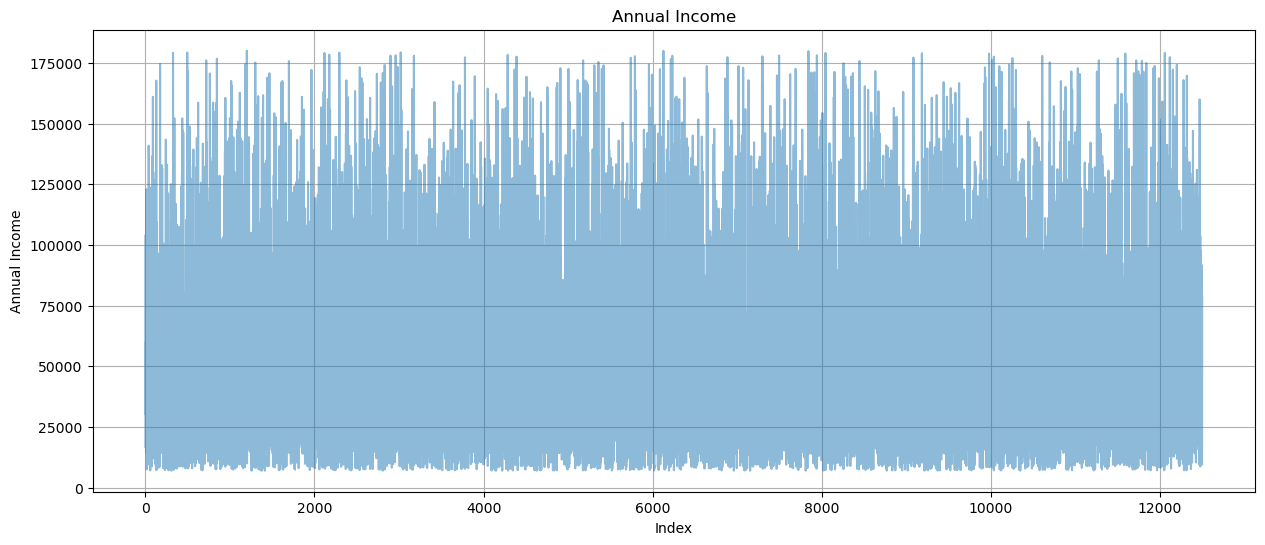

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(annual_income.index, annual_income['Annual_Income'], alpha=0.5)
plt.title('Annual Income')
plt.xlabel('Index')
plt.ylabel('Annual Income')
plt.grid(True)
plt.show()



C:\Users\Unni\AppData\Local\Temp\ipykernel_22568\2147021943.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(credit_data.corr(), annot=True)


<Axes: >

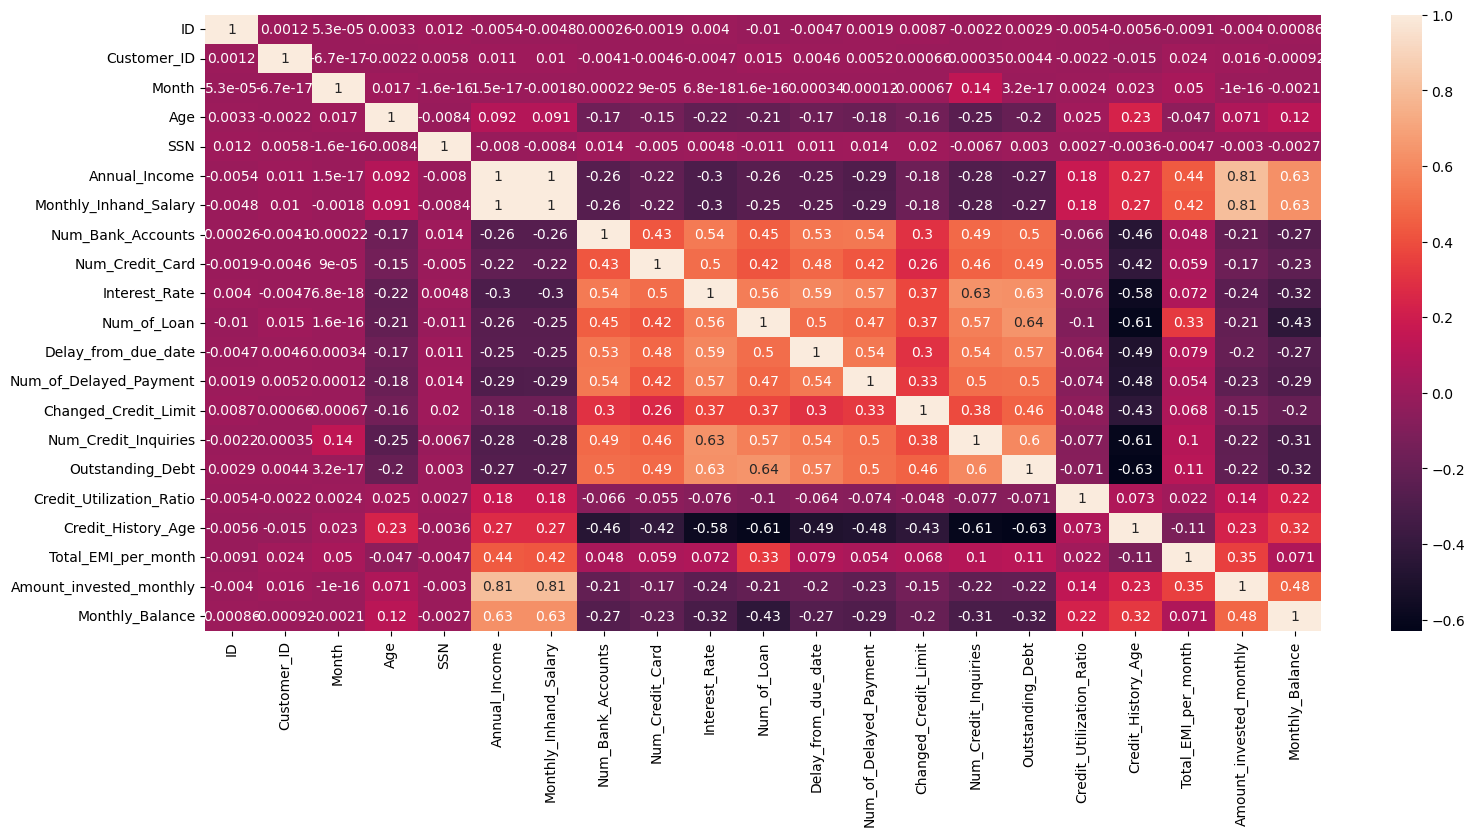

In [30]:
# Heat map

plt.figure(figsize=(18,8))
sns.heatmap(credit_data.corr(), annot=True)

In [31]:
# Distribution of Credit_Score

credit_score = credit_data.groupby("Customer_ID")["Credit_Score"].value_counts().reset_index(name = "count")
credit_score["Credit_Score"].value_counts()


Standard    11100
Poor         5203
Good         3519
Name: Credit_Score, dtype: int64

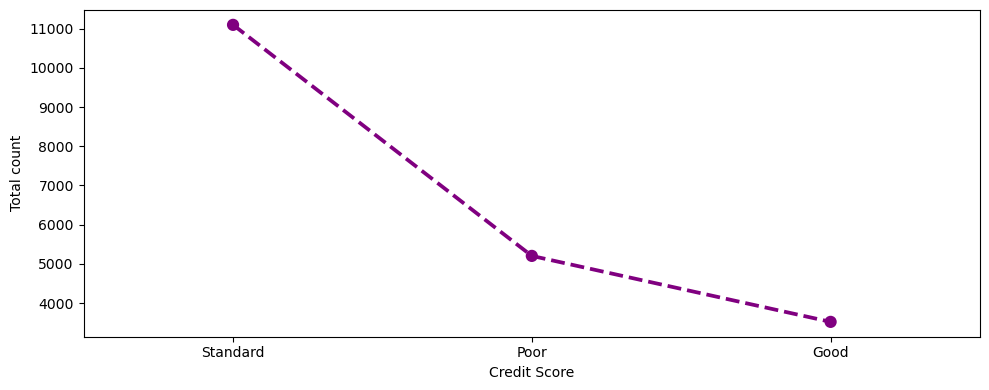

In [32]:
plt.figure(figsize=(10,4))
ax = sns.pointplot(x = credit_score["Credit_Score"].value_counts().index, y = credit_score["Credit_Score"].value_counts().values,linestyles='--',color="purple" )
plt.xlabel("Credit Score")
plt.ylabel("Total count")
plt.tight_layout()
plt.show()

### Feature Selection

#### Feature Important from Tree-Based Models

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

X = credit_data.drop(columns=["ID","Customer_ID","Credit_Score","Name","Occupation","Type_of_Loan","Payment_Behaviour"])
y = credit_data["Credit_Score"]

X["Credit_Mix"] = encoder.fit_transform(X["Credit_Mix"])
X["Payment_of_Min_Amount"] = encoder.fit_transform(X["Payment_of_Min_Amount"])

rf = RandomForestClassifier()
rf.fit(X,y)

feature_importance = rf.feature_importances_

indices = feature_importance.argsort()[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], feature_importance[indices[f]]))

Feature ranking:
1. feature 14 (0.106872)
2. feature 7 (0.081058)
3. feature 13 (0.080011)
4. feature 16 (0.065911)
5. feature 9 (0.058093)
6. feature 11 (0.055391)
7. feature 20 (0.049251)
8. feature 15 (0.046862)
9. feature 0 (0.041878)
10. feature 18 (0.040655)
11. feature 2 (0.040145)
12. feature 10 (0.040074)
13. feature 6 (0.039195)
14. feature 12 (0.038444)
15. feature 19 (0.038396)
16. feature 3 (0.038235)
17. feature 4 (0.037711)
18. feature 1 (0.034886)
19. feature 5 (0.024519)
20. feature 8 (0.022133)
21. feature 17 (0.020281)


In [92]:
col = X.columns
for i in range(0,21):
    print(i, " ---> ", col[i])

0  --->  Month
1  --->  Age
2  --->  SSN
3  --->  Annual_Income
4  --->  Monthly_Inhand_Salary
5  --->  Num_Bank_Accounts
6  --->  Num_Credit_Card
7  --->  Interest_Rate
8  --->  Num_of_Loan
9  --->  Delay_from_due_date
10  --->  Num_of_Delayed_Payment
11  --->  Changed_Credit_Limit
12  --->  Num_Credit_Inquiries
13  --->  Credit_Mix
14  --->  Outstanding_Debt
15  --->  Credit_Utilization_Ratio
16  --->  Credit_History_Age
17  --->  Payment_of_Min_Amount
18  --->  Total_EMI_per_month
19  --->  Amount_invested_monthly
20  --->  Monthly_Balance


#### Recursive Feature Elimination

In [94]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# seperating feature and target class

x = credit_data.drop(columns=["ID","Customer_ID","SSN","Credit_Score","Name","Occupation","Type_of_Loan","Payment_Behaviour"])
y = credit_data["Credit_Score"]

x["Credit_Mix"] = encoder.fit_transform(x["Credit_Mix"])
x["Payment_of_Min_Amount"] = encoder.fit_transform(x["Payment_of_Min_Amount"])

estimator_rf = RandomForestClassifier()

selector = RFE(estimator = estimator_rf, n_features_to_select=10)

selector = selector.fit(x,y)

selected_indices = selector.get_support(indices=True)

selected_features = x.columns[selected_indices]

print(selected_features)

Index(['Annual_Income', 'Interest_Rate', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Monthly_Balance'],
      dtype='object')


In [143]:
#Plotiing feature ranks

d = {"Features": x.columns, "Feature ranking" : ranking}

data = pd.DataFrame(d)

In [144]:
data.head()

,Features,Feature ranking
0,Month,7
1,Age,8
2,Annual_Income,1
3,Monthly_Inhand_Salary,5
4,Num_Bank_Accounts,9


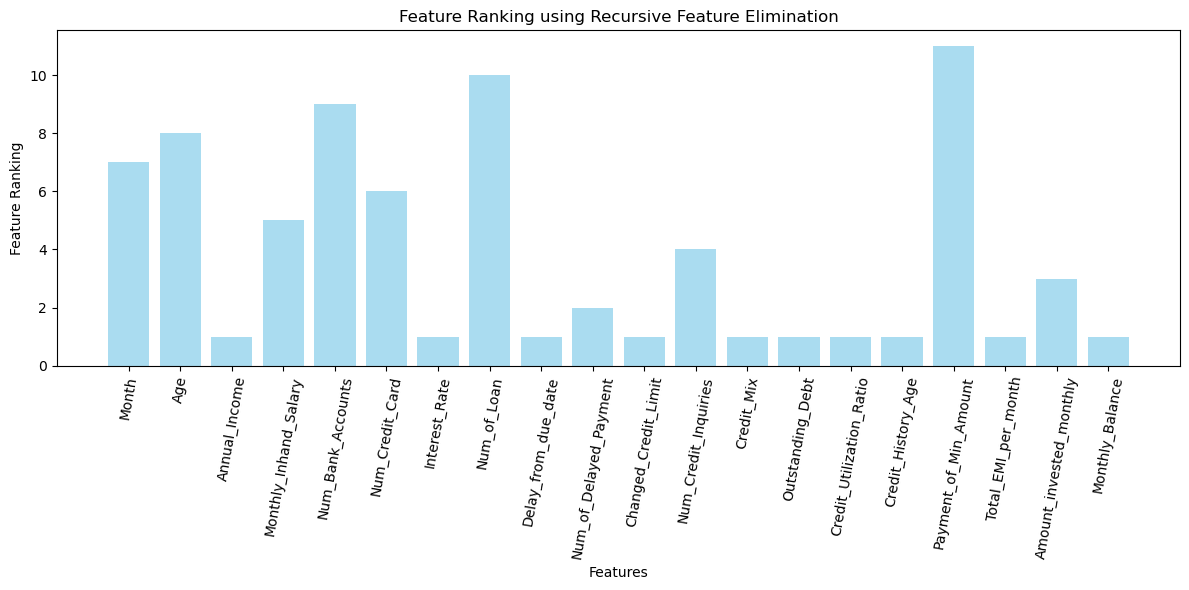

In [146]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.bar(x = data["Features"], height = data["Feature ranking"], align='center', color='skyblue', alpha=0.7)
plt.xticks(rotation=80)
plt.xlabel('Features')
plt.ylabel('Feature Ranking')
plt.title('Feature Ranking using Recursive Feature Elimination')
plt.tight_layout()
plt.show()

In [35]:
# Selected Feature

selected_features = credit_data[["Annual_Income","Num_Bank_Accounts","Num_Credit_Card","Num_of_Delayed_Payment","Num_Credit_Inquiries","Credit_Mix","Outstanding_Debt","Credit_Utilization_Ratio","Credit_History_Age","Payment_of_Min_Amount","Credit_Score"]]

In [36]:
credit_features = selected_features.copy()

### Data Preprocessing

#### Encoding and Scaling

In [37]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder

encoder_le = LabelEncoder()
oneh_encoder = OneHotEncoder()

scaler = StandardScaler()

In [38]:
X = selected_features.drop(columns=("Credit_Score"))
y = selected_features["Credit_Score"]

In [39]:
#Encoding and Scaling predictive features

#Onehot encoding

from sklearn.preprocessing import OneHotEncoder
oneh_encoder = OneHotEncoder()


#Encoding and Scaling predictive features

creditmix = X["Credit_Mix"].values.reshape(-1,1)

en_creditmix = oneh_encoder.fit_transform(creditmix).toarray()
encoded_credtmix = pd.DataFrame(en_creditmix, columns = oneh_encoder.get_feature_names_out(['Creditmix_']))



pay_minamt = X["Payment_of_Min_Amount"].values.reshape(-1,1)

en_paymin= oneh_encoder.fit_transform(pay_minamt).toarray()
encoded_paymin = pd.DataFrame(en_paymin, columns = oneh_encoder.get_feature_names_out(['Paymin_']))



In [40]:

# merging encodedvalues 

encoded_credtmix.set_index(X.index, inplace = True)
X = pd.concat([X, encoded_credtmix], axis=1)

encoded_paymin.set_index(X.index, inplace = True)
X = pd.concat([X,encoded_paymin], axis=1)

X.drop(columns=["Credit_Mix","Payment_of_Min_Amount"], inplace=True)

In [41]:
X = scaler.fit_transform(X)

In [42]:
# Encoding target feature
y = encoder_le.fit_transform(y)

In [43]:
credit_features["Labelled"] = y
credit_features.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Credit_Score,Labelled
0,19114.12,3.0,4.0,7.0,4.0,Good,809.98,26.822620,265.0,No,Good,0
1,19114.12,3.0,4.0,4.0,4.0,Good,809.98,31.944960,266.0,No,Good,0
2,19114.12,3.0,4.0,7.0,4.0,Good,809.98,28.609352,267.0,No,Good,0
3,19114.12,3.0,4.0,4.0,4.0,Good,809.98,31.377862,268.0,No,Good,0
4,19114.12,3.0,4.0,4.0,4.0,Good,809.98,24.797347,269.0,No,Good,0


#### Train test Split

In [44]:
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80000, 13) (20000, 13) (80000,) (20000,)


### Modeling

* SVM

In [46]:
#Initializing and Importing SVM classifier
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [47]:
svm_predict = svm_model.predict(X_test)

In [48]:
# EVALUATION

from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score : ", accuracy_score(svm_predict, y_test))
print("Classification report:\n ", classification_report(y_test, svm_predict))

Accuracy score :  0.67215
Classification report:
                precision    recall  f1-score   support

           0       0.54      0.74      0.62      3527
           1       0.66      0.63      0.64      5874
           2       0.75      0.67      0.71     10599

    accuracy                           0.67     20000
   macro avg       0.65      0.68      0.66     20000
weighted avg       0.69      0.67      0.67     20000



* Decision Tree

In [45]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
dt_predict = dt_model.predict(X_test)

In [47]:
# EVALUATION
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score: ", accuracy_score(dt_predict, y_test))
print("Classification report:\n ", classification_report(y_test, dt_predict))

Accuracy score:  0.75965
Classification report:
                precision    recall  f1-score   support

           0       0.71      0.70      0.70      3527
           1       0.76      0.75      0.75      5874
           2       0.78      0.79      0.78     10599

    accuracy                           0.76     20000
   macro avg       0.75      0.74      0.75     20000
weighted avg       0.76      0.76      0.76     20000



* Random forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
rf_predict = rf_model.predict(X_test)

In [50]:
# EVALUATION
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy Score: ", accuracy_score(rf_predict, y_test))
print("Classification report:\n ", classification_report(y_test, rf_predict))

Accuracy Score:  0.8023
Classification report:
                precision    recall  f1-score   support

           0       0.75      0.75      0.75      3527
           1       0.80      0.81      0.81      5874
           2       0.82      0.81      0.82     10599

    accuracy                           0.80     20000
   macro avg       0.79      0.79      0.79     20000
weighted avg       0.80      0.80      0.80     20000



In [35]:
#import pickle
#pickle.dump(rf_model, open("rf_model.pkl", "wb"))

* Gradient Boost Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
gbc_predict = gbc_model.predict(X_test)

In [57]:
# EVALUATION

print("Accuracy score: ", accuracy_score(gbc_predict, y_test))
print("Classification report:\n ", classification_report(y_test, gbc_predict))

Accuracy score:  0.68395
Classification report:
                precision    recall  f1-score   support

           0       0.56      0.69      0.62      3527
           1       0.71      0.58      0.64      5874
           2       0.72      0.74      0.73     10599

    accuracy                           0.68     20000
   macro avg       0.66      0.67      0.66     20000
weighted avg       0.69      0.68      0.68     20000



* XGBOOST

In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [31]:
xgb_predict = xgb_model.predict(X_test)

In [33]:
# EVALUATION
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy score: ", accuracy_score(xgb_predict, y_test))
print("Classification report:\n ", classification_report(y_test, xgb_predict))

Accuracy score:  0.7421
Classification report:
                precision    recall  f1-score   support

           0       0.65      0.71      0.68      3527
           1       0.73      0.72      0.73      5874
           2       0.78      0.76      0.77     10599

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.73     20000
weighted avg       0.74      0.74      0.74     20000



### Cross validation

In [61]:
from sklearn.model_selection import KFold, cross_val_score

classification_model = [("SVM Classifier",SVC()),
                       ("Decision Tree Classifier"  , DecisionTreeClassifier()),
                       ("Random Forest Classifier", RandomForestClassifier()),
                       ("Gradient Boost Classifier",GradientBoostingClassifier()),
                       ("XGBOOST Classifier", XGBClassifier())]

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

cv_results = pd.DataFrame(columns=["Model", "CV_mean_score"])

for mname, model in classification_model:
    cross_val = cross_val_score(model, X_train,y_train, cv = kfold)
    mean_score = cross_val.mean()
    cv_results = cv_results.append({"Model": mname, "CV_mean_score": mean_score}, ignore_index=True)

print(cv_results)

C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\1045275867.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append({"Model": mname, "CV_mean_score": mean_score}, ignore_index=True)
C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\1045275867.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append({"Model": mname, "CV_mean_score": mean_score}, ignore_index=True)
C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\1045275867.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append({"Model": mname, "CV_mean_score": mean_score}, ignore_index=True)
C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\1045275867.py:16: FutureWarning: The frame.append meth

                       Model  CV_mean_score
0             SVM Classifier       0.675088
1   Decision Tree Classifier       0.738588
2   Random Forest Classifier       0.795250
3  Gradient Boost Classifier       0.685125
4         XGBOOST Classifier       0.738263


C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\1045275867.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cv_results = cv_results.append({"Model": mname, "CV_mean_score": mean_score}, ignore_index=True)


### Hyperparameter Tuning

* Decision Tree

In [31]:
parameter_dt = {"criterion" : ["gini", "entropy", "log_loss"],
               'max_depth': [40, 50, 60, 70],
                'min_samples_split': (2, 10)}

In [32]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

dt_grid_search = GridSearchCV(DecisionTreeClassifier(),
                                  parameter_dt,
                                  cv=5,
                                  scoring="accuracy",
                                  n_jobs=-1,
                                  verbose=1)

In [65]:
dt_grid_result = dt_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [66]:
dt_grid_search.best_params_
dt_grid_result.best_score_

0.746425

In [33]:
# training Decision tree with tuned parameters

dt_tuned = DecisionTreeClassifier(criterion="entropy", max_depth=60, min_samples_split=2)
dt_tuned.fit(X_train, y_train)

dt_tunrd_pred = dt_tuned.predict(X_test)

In [34]:
print("Accuracy of tuned DT model: ", accuracy_score(dt_tunrd_pred,y_test))

Accuracy of tuned DT model:  0.761


* Ranfom Forest

In [69]:
parameters ={'max_depth': [40, 50, 60, 70],
              'criterion' : ['gini', 'entropy'],
              'n_estimators': [50,100,200,400] }

In [70]:
 #Bayesian optimization
from skopt import BayesSearchCV

bayes_search = BayesSearchCV(rf_model, parameters, n_iter=10, cv=5, scoring='accuracy')
bayes_search.fit(X_train, y_train)

# best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

#best parameters
best_model = bayes_search.best_estimator_

Best Hyperparameters: OrderedDict([('criterion', 'gini'), ('max_depth', 60), ('n_estimators', 400)])


In [71]:
bayes_search.best_score_

0.7978875000000001

In [45]:
# Training with tuned parameter

rf_tuned = RandomForestClassifier(criterion="gini", max_depth=50, n_estimators = 400)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=400)

In [46]:
rf_tuned_pred = rf_tuned.predict(X_test)
print("Accuracy  score on tuned model : ", accuracy_score(y_test,rf_tuned_pred ))

Accuracy  score on tuned model :  0.81035


* XGBoost

In [39]:
xg_parameter = {"learning_rate": (0.01, 1.0),  
    'max_depth': (1, 20), 
    'min_child_weight': (1, 10), 
    'colsample_bytree': (0.5, 1.0),  
    'n_estimators': (50, 200),  
    }

In [40]:
 #Bayesian optimization
from skopt import BayesSearchCV

xg_bayes_search = BayesSearchCV(xgb_model,
                                xg_parameter, 
                                n_iter=10, 
                                cv=5, 
                                scoring='accuracy')
xg_bayes_search.fit(X_train, y_train)

# best hyperparameters
xg_best_params = xg_bayes_search.best_params_
print("Best Hyperparameters:", xg_best_params)

#best parameters
xg_best_model = xg_bayes_search.best_estimator_

Best Hyperparameters: OrderedDict([('colsample_bytree', 0.528476702060638), ('learning_rate', 0.37848072823357404), ('max_depth', 13), ('min_child_weight', 7), ('n_estimators', 172)])


In [40]:
# Training with tuned parameter

xgb_tuned = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.05, max_depth = 15, n_estimators = 50 )
xgb_tuned.fit(X_train, y_train)
xgb_tuned_pred = xgb_tuned.predict(X_test)

In [41]:
print("Accuracy of tuned XGB: ", accuracy_score(y_test, xgb_tuned_pred))

Accuracy of tuned XGB:  0.79285


In [42]:
#import pickle
#pickle.dump(xgb_tuned, open("xg_tuned.pkl", "wb"))

#### Cross validation on Random Forest Classifier

In [80]:
from sklearn.model_selection import KFold, cross_val_score

kfold_tuned = KFold(n_splits=5, random_state=42, shuffle=True)

rf_crossval = cross_val_score(rf_tuned, X,y, cv = kfold_tuned)

rf_crossval.mean()

0.8078

#### Threshold Selection

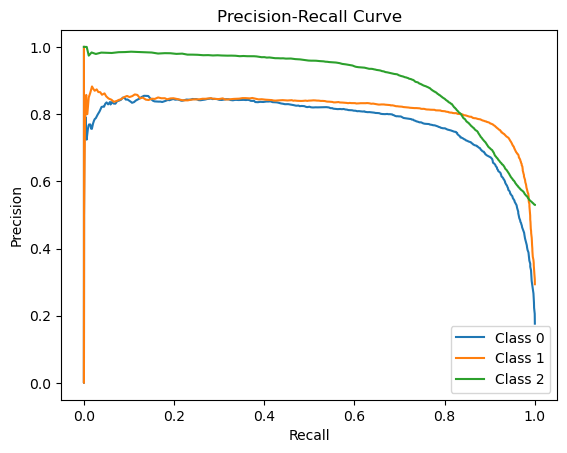

In [150]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve

# Converting labels to binary format
y_test_binary = label_binarize(y_test, classes=np.unique(y_test))

# Predicting probabilities for the test set
y_scores = rf_tuned.predict_proba(X_test)



n_classes = len(rf_tuned.classes_)

# Calculateing precision-recall curve for each class
precision = dict()
recall = dict()
thresholds = dict()
for i in range(n_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_binary[:, i], y_scores[:, i])

# Ploting precision-recall curve 
plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


In [149]:
f1_scores = dict()

# Calculate F1-score for each class
for i in range(n_classes):
    f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

# Finding the threshold value for each class that maximizes the F1-score
optimal_thresholds = dict()
for i in range(n_classes):
    optimal_idx = np.argmax(f1_scores[i])
    optimal_thresholds[i] = thresholds[i][optimal_idx]


for i in range(n_classes):
    print("Optimal Threshold for Class {}: {}".format(i, optimal_thresholds[i]))


Optimal Threshold for Class 0: 0.9975
Optimal Threshold for Class 1: 0.995
Optimal Threshold for Class 2: 0.475


C:\Users\Unni\AppData\Local\Temp\ipykernel_21536\2867415218.py:6: RuntimeWarning: invalid value encountered in divide
  f1_scores[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])


* Serializing and saving the Random forest model

In [152]:
import pickle
pickle.dump(rf_tuned, open("rf_tunedmodel.pkl", "wb"))